# **TEXT MINING: CONVERTING UNSTRUCTURED DATA INTO INSIGHTS**
Text mining, also known as text analytics, is the process of deriving meaningful patterns, insights, and information from unstructured textual data. It involves the application of various natural language processing (NLP) techniques, machine learning algorithms, and statistical methods to extract valuable knowledge from large volumes of text.

#### **Some Text Mining Techniques:**

- Sentiment analysis
- Topic modeling
- Named entity recognition
- Text classification
- Information retrieval

#### **Text Mining Process:**

- Data Collection: Gather relevant text data from various sources like websites, social media, documents, etc.
- Text Preprocessing: organize data.
- Tokenization: Breaking text into words or phrases.
- Stopword removal: Eliminating common words with little meaning.
- Stemming/Lemmatization: Reducing words to their base or root form.

#### **Areas within Text Mining**
- **Social Media Evaluation:** Focuses on analyzing textual data from social media platforms.
- **Semantic Analysis:** Involves deciphering word meanings in context.
- **Chatbots:** Utilizes text mining techniques to enhance the responsiveness of chatbots.
- **Deep Learning for Text Analysis:** Employs deep learning algorithms for more advanced and nuanced text analysis.
- **Machine Translation:** Facilitates the translation of text from one language to another.
- **Text Generation:** Involves using text mining techniques for content creation.
- **Information Extraction/Sentiment Analysis:** Focuses on extracting valuable information and insights from textual data.

#### **Example 1 - Text Mining - words count on text**

In [ ]:
# install nltk library if requiered
%pip install nltk

#import libraries requiered
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Download required resources
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

Tokenized Words: ['text', 'mining', 'is', 'the', 'process', 'of', 'extracting', 'valuable', 'information', 'from', 'unstructured', 'text', 'data', '.', 'it', 'involves', 'various', 'techniques', 'such', 'as', 'tokenization', ',', 'stemming', ',', 'and', 'sentiment', 'analysis', '.']
Filtered Words: ['text', 'mining', 'process', 'extracting', 'valuable', 'information', 'unstructured', 'text', 'data', 'involves', 'various', 'techniques', 'tokenization', 'stemming', 'sentiment', 'analysis']
Frequency Distribution: <FreqDist with 15 samples and 16 outcomes>


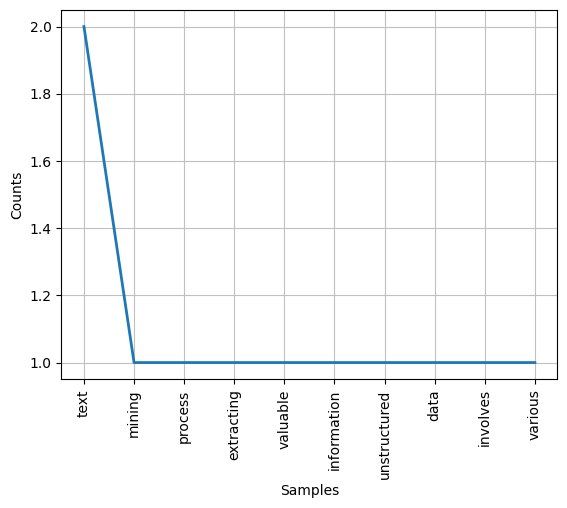

In [3]:
# Sample text for analysis
text = """Text mining is the process of extracting valuable information from unstructured text data.
            It involves various techniques such as tokenization, stemming, and sentiment analysis."""

# Tokenization
words = word_tokenize(text.lower())  # Convert to lowercase for consistency
print("Tokenized Words:", words)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
print("Filtered Words:", filtered_words)

# Frequency Distribution
fdist = FreqDist(filtered_words)
print("Frequency Distribution:", fdist)

# Plot the top 10 most common words
fdist.plot(10, cumulative=False)
plt.show()


#### **Example 2 - Mining text in a pdf file**
word frecuency, top 20 words, sentimental analysis, bigrams and trigrams

In [ ]:
# install libraries requiered
%pip install tabulate
%pip install
%pip install PyMuPDF
%pip install wordcloud

#import libraries
import nltk
from tabulate import tabulate
import fitz
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk import bigrams, trigrams, pos_tag, ne_chunk
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

Word Frecuency Diagram


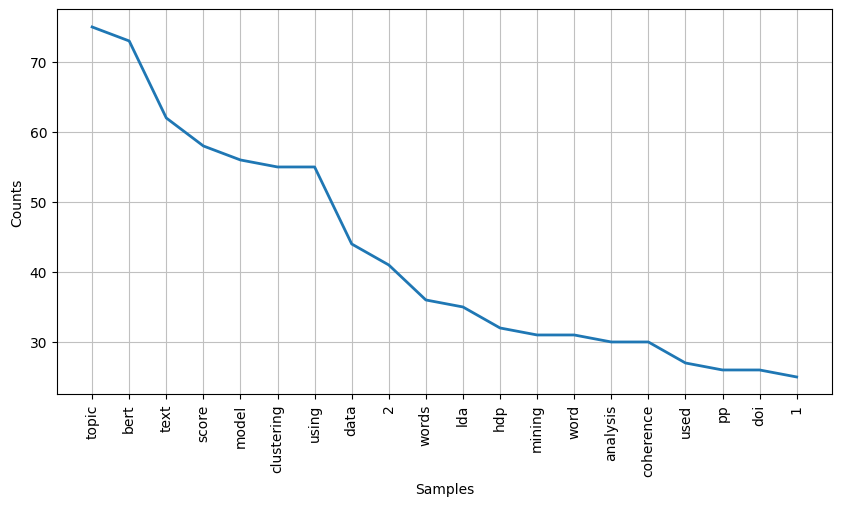

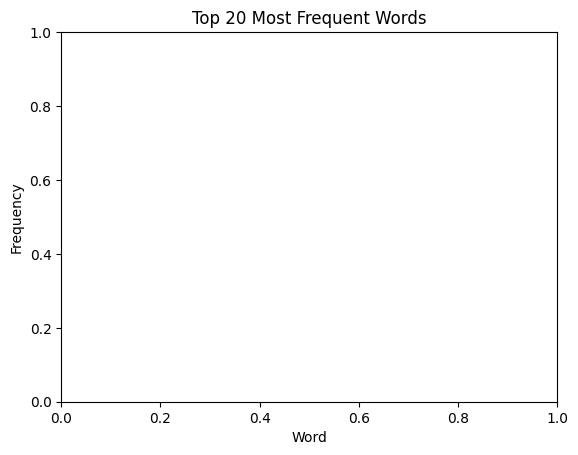

Word Cloud


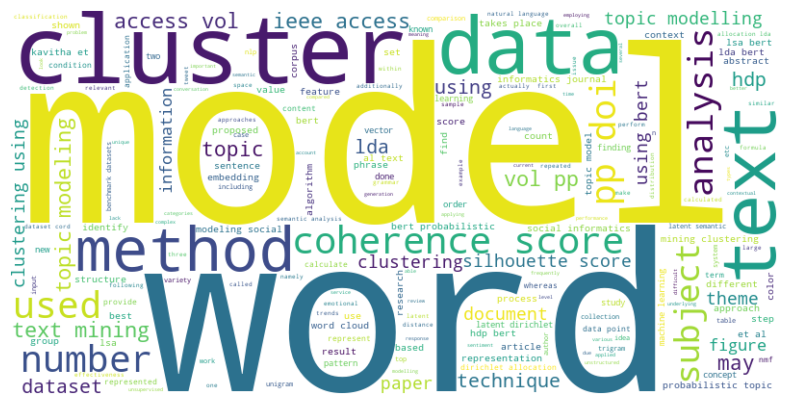

Sentimental Analysis
+-----------------+------------+------------+------------+------------------+
| Sentiment Score | neg: 0.017 | neu: 0.915 | pos: 0.067 | compound: 0.9999 |
+-----------------+------------+------------+------------+------------------+
+-----------------+------------+------------+------------+------------------+
bigrams and trigrams


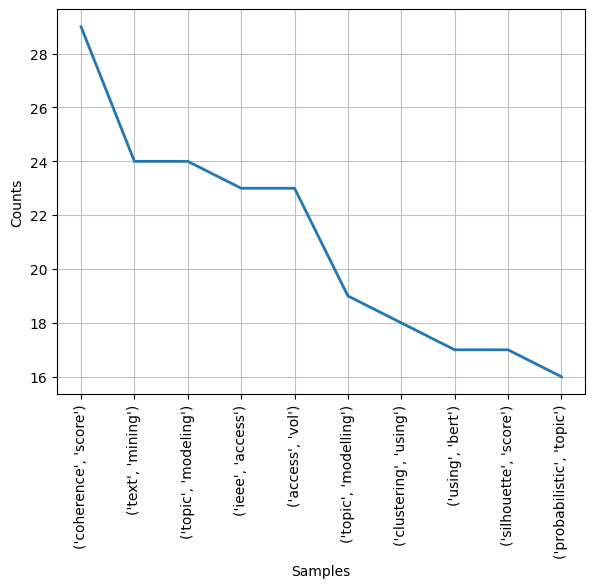

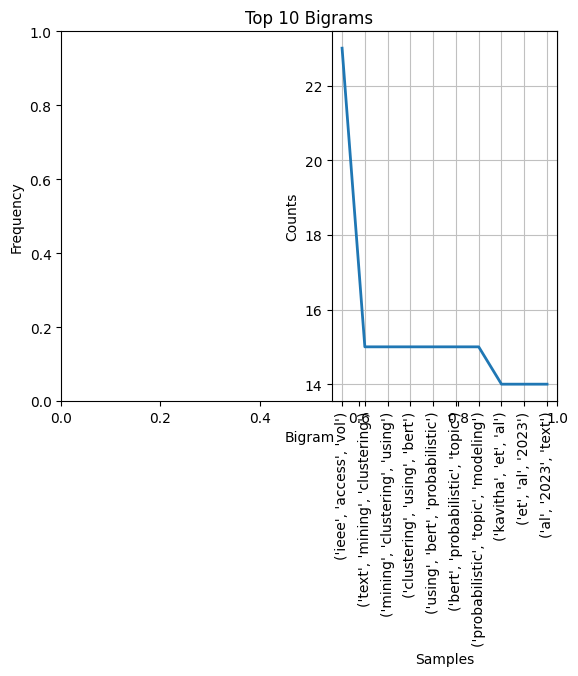

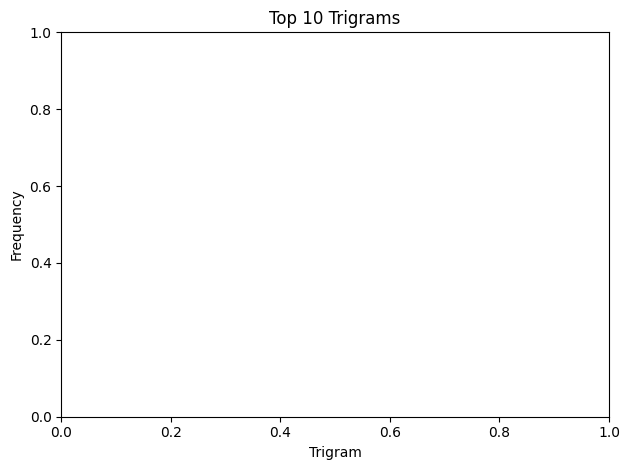

In [34]:
# extracting words from the file
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page_num in range(doc.page_count):
        page = doc[page_num]
        text += page.get_text()
    return text

def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text.lower())  # Convert to lowercase for consistency

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

    return filtered_words

def plot_word_frequency(filtered_words, top_n=10):
    # Frequency Distribution
    fdist = FreqDist(filtered_words)

    # Plot the top N most common words
    plt.figure(figsize=(10, 5))
    fdist.plot(top_n, cumulative=False)
    plt.title(f'Top {top_n} Most Frequent Words')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.show()

def plot_word_cloud(filtered_words):
    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

    # Plot WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def perform_sentiment_analysis(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(text)
    return sentiment_score

def plot_bigrams_trigrams(filtered_words):
    # Bigrams
    bigrams_list = list(bigrams(filtered_words))
    fdist_bigrams = FreqDist(bigrams_list)

    # Trigrams
    trigrams_list = list(trigrams(filtered_words))
    fdist_trigrams = FreqDist(trigrams_list)

    # Plot the top N most common bigrams
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    fdist_bigrams.plot(10, cumulative=False)
    plt.title('Top 10 Bigrams')
    plt.xlabel('Bigram')
    plt.ylabel('Frequency')

    # Plot the top N most common trigrams
    plt.subplot(1, 2, 2)
    fdist_trigrams.plot(10, cumulative=False)
    plt.title('Top 10 Trigrams')
    plt.xlabel('Trigram')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

def analyze_pdf(pdf_path, max_tokens=None):
    # Extract text from the PDF
    pdf_text = extract_text_from_pdf(pdf_path)

    # Limit the number of tokens if specified
    if max_tokens:
        pdf_text = ' '.join(word_tokenize(pdf_text)[:max_tokens])

    # Preprocess the text
    preprocessed_words = preprocess_text(pdf_text)

    # 1. Analyze and plot word frequency
    print("Word Frecuency Diagram")
    plot_word_frequency(preprocessed_words, top_n=20)

    # 2. Analyze and plot word cloud
    print("Word Cloud")
    plot_word_cloud(preprocessed_words)

    # 3. Perform sentiment analysis
    print("Sentimental Analysis")
    sentiment_score = perform_sentiment_analysis(pdf_text)

    # Print sentiment score as a table
    table = tabulate([["Sentiment Score"] + [f"{k}: {v}" for k, v in sentiment_score.items()]], headers="firstrow", tablefmt="pretty")
    print(table)

    # 4. Plot bigrams and trigrams
    print("bigrams and trigrams")
    plot_bigrams_trigrams(preprocessed_words)

# Path to the PDF file
pdf_path = 'C:/Users/yeiso/Documents/GitHub/Special-Topics-in-Data-Analytics-CSIS-4260-002/docs/TEXT_MINING_CLUSTERING_USING_BERT_AND_PROBABILISTI.pdf'

# Analyze the PDF (limiting to 1000 tokens for example)
analyze_pdf(pdf_path)

#### **Example 3 - Sentiment Analysis using Vector Support Machine with a sample data**

In [ ]:
# Install NLTK
%pip install nltk

# Install scikit-learn
%pip install scikit-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [21]:
# Sample data
data = {'Text': ["I love this product!", "Not happy with the service.", "Amazing experience!"],
        'Status': ["Positive", "Negative", "Positive"]}  # Assuming 'Status' is your sentiment column
df = pd.DataFrame(data)

# Assume you have a column named 'Text' containing the text data
X = df['Text']
y = df['Status']  # Replace 'Status' with the actual column containing sentiments

# Preprocessing: Tokenization, removing stop words, and stemming
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    words = word_tokenize(text)
    filtered_words = [ps.stem(word.lower()) for word in words if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(filtered_words)

X = X.apply(preprocess_text)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Build a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      1.00      0.00       0.0
    Positive       1.00      0.00      0.00       1.0

    accuracy                           1.00       1.0
   macro avg       0.50      0.50      0.00       1.0
weighted avg       1.00      0.00      0.00       1.0



#### **Example 4 - Sentiment Analysis using Vector Support Machine with a random data**

In [18]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate a synthetic dataset with 100 rows
data = {
    'Text': [' '.join(np.random.choice(['good', 'bad', 'neutral'], size=np.random.randint(5, 15))) for _ in range(100)],
    'Status': np.random.choice(['Positive', 'Negative', 'Neutral'], size=100)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

                                                Text    Status
0  good neutral neutral good good neutral bad neu...  Negative
1  good neutral bad good bad bad bad bad good goo...  Negative
2  good neutral neutral neutral bad neutral bad b...  Negative
3         good neutral neutral good good neutral bad   Neutral
4                 good bad bad bad good bad good bad  Positive


#### **Example 5 - Sentiment Analysis using Vector Support Machine to distinguish setosa from non-setosa iris flowers**

In [22]:
# Step 1: Load the necessary libraries
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load the Iris dataset
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# For simplicity, let's focus on binary classification (setosa vs. non-setosa)
# Mapping classes to binary labels: 0 (non-setosa) and 1 (setosa)
y_binary = (y == 0).astype(int)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Step 4: Initialize the SVM classifier model
svm_clf = SVC(kernel='linear', random_state=42)

# Step 5: Fit the SVM classifier model
svm_clf.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = svm_clf.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



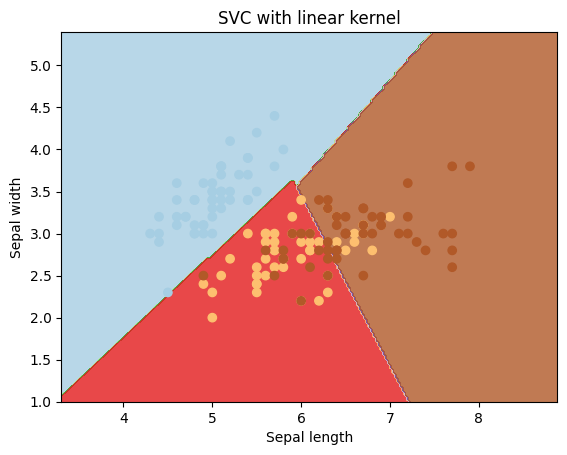

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target

C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma=0).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()